In [1]:
# import the packages
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
from imutils.object_detection import non_max_suppression

In [2]:
# load EAST text detection model
net = cv2.dnn.readNet("frozen_east_text_detection.pb")

In [3]:
# load the target image 
image = cv2.imread("images/symbol.jpg", cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# store original
orig = image.copy()

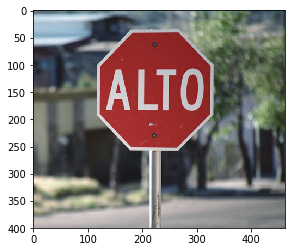

In [4]:
plt.imshow(image)

In [5]:
# let take the sape of image and resize it
(H, W) = image.shape[:2]
(newW, newH) = (320,320)

# ratio calculation
rW = W / float(newW)
rH = H / float(newH)

# resize the image 
image = cv2.resize(image, (newW, newH))

# new size
(H, W) = image.shape[:2]

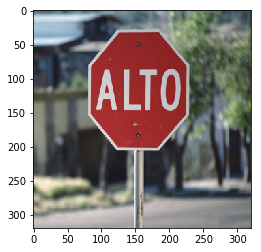

In [6]:
plt.imshow(image)

# Define the two output layer names for the EAST detector model 
we are interested -- the first is the output probabilities and the
second can be used to derive the bounding box coordinates of text


In [7]:
layerNames = ["feature_fusion/Conv_7/Sigmoid","feature_fusion/concat_3"]

In [8]:
# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets

# imp and new method 
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),(123.68, 116.78, 103.94), swapRB=True, crop=False)

In [9]:
start = time.time()
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
end = time.time()

In [10]:
print("text detection took {:.6f} seconds".format(end - start))

text detection took 0.509605 seconds


In [11]:
print(scores)

[[[[2.92882163e-07 6.68469681e-07 6.20176252e-07 ... 1.33187291e-06
    1.43888985e-06 4.58112663e-06]
   [2.55705754e-06 9.18066348e-07 8.80208063e-07 ... 1.79179938e-06
    1.03618345e-06 3.86394277e-06]
   [1.73534056e-06 7.47228910e-07 7.24452548e-07 ... 1.25310271e-06
    3.40946286e-07 7.16715249e-06]
   ...
   [4.78486663e-06 1.17878869e-06 1.01561955e-06 ... 1.49376206e-06
    3.59696088e-07 3.45372223e-06]
   [1.42916087e-06 6.64358424e-07 5.75392050e-07 ... 1.84810597e-06
    1.88418994e-06 8.12085182e-06]
   [2.97971610e-06 2.07046000e-07 1.02417346e-07 ... 1.44933850e-07
    7.12263315e-08 4.29352163e-08]]]]


In [12]:
print(geometry)

[[[[ 1.64199860e+02  1.29935913e+02  1.33070496e+02 ...  1.43397476e+02
     1.34985992e+02  1.63440750e+02]
   [ 1.36086517e+02  7.63610229e+01  8.03492203e+01 ...  8.32250671e+01
     8.07514420e+01  1.21131676e+02]
   [ 1.42926529e+02  8.52651291e+01  9.08294678e+01 ...  9.04846802e+01
     8.71714401e+01  1.28313217e+02]
   ...
   [ 1.50175842e+02  9.28149109e+01  1.06029549e+02 ...  1.06336128e+02
     1.00990303e+02  1.39355515e+02]
   [ 1.42689713e+02  9.16606216e+01  1.06310799e+02 ...  1.02746964e+02
     9.83909225e+01  1.29760391e+02]
   [ 1.81496567e+02  1.42812653e+02  1.61800476e+02 ...  1.52636139e+02
     1.46488586e+02  1.65342484e+02]]

  [[ 1.13945343e+02  9.09461441e+01  8.90329132e+01 ...  1.06299591e+02
     1.00506317e+02  1.24026161e+02]
   [ 8.68771439e+01  5.12742233e+01  4.99339981e+01 ...  6.17080803e+01
     5.82961922e+01  9.10140457e+01]
   [ 9.12629852e+01  5.21140175e+01  5.16115150e+01 ...  6.26059113e+01
     5.93093300e+01  9.23951874e+01]
   ...
   

In [13]:
# grab the number of rows and columns from the scores volume, then
# initialize our set of bounding box rectangles and corresponding
# confidence scores
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

In [14]:
for y in range(0, numRows):
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]
    
    # loop over the number of columns
    for x in range(0, numCols):
        # if our score does not have sufficient probability, ignore it
        if scoresData[x] < 0.5:
            continue
        # important steps
        (offsetX, offsetY) = (x * 4.0, y * 4.0)
        
        #issue with this code improve it because rectangle not tilted
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)
        
        # use the geometry volume to derive the width and height of
        # the bounding box
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]
        
        # compute both the starting and ending (x, y)-coordinates for
        # the text prediction bounding box
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)
        
        # add the bounding box coordinates and probability score to
        # our respective lists
        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])

In [15]:
# These are the points where our rectangle is going to display
for rect in enumerate(rects):
    print(rect)


(0, (91, 82, 220, 149))
(1, (89, 82, 219, 150))
(2, (87, 82, 219, 150))
(3, (86, 82, 220, 150))
(4, (86, 82, 221, 149))
(5, (85, 81, 221, 148))
(6, (87, 81, 222, 148))
(7, (88, 80, 222, 148))
(8, (89, 81, 223, 148))
(9, (86, 81, 223, 149))
(10, (84, 80, 224, 149))
(11, (84, 80, 224, 148))
(12, (85, 80, 225, 148))
(13, (85, 80, 226, 148))
(14, (85, 79, 226, 147))
(15, (83, 79, 227, 146))
(16, (90, 80, 226, 144))
(17, (89, 81, 223, 146))
(18, (88, 81, 222, 146))
(19, (89, 82, 221, 147))
(20, (90, 82, 222, 147))
(21, (91, 82, 222, 147))
(22, (91, 81, 222, 148))
(23, (91, 83, 221, 149))
(24, (89, 82, 221, 149))
(25, (87, 82, 220, 149))
(26, (87, 82, 221, 149))
(27, (86, 83, 220, 149))
(28, (86, 82, 221, 148))
(29, (89, 82, 222, 148))
(30, (88, 82, 222, 149))
(31, (88, 81, 222, 148))
(32, (86, 82, 223, 149))
(33, (85, 82, 224, 149))
(34, (85, 80, 224, 148))
(35, (86, 80, 225, 148))
(36, (86, 79, 225, 148))
(37, (84, 80, 224, 148))
(38, (84, 79, 225, 148))
(39, (90, 82, 223, 145))
(40, (88, 

In [16]:
print(confidences)

[0.67670095, 0.8271088, 0.94468975, 0.9646002, 0.9755004, 0.98984665, 0.9947918, 0.99889743, 0.99931145, 0.9994191, 0.99949896, 0.9995384, 0.9995466, 0.9995376, 0.9994012, 0.93171555, 0.99926084, 0.99962115, 0.99973136, 0.999728, 0.9997341, 0.999708, 0.9996973, 0.9996934, 0.99970955, 0.9997255, 0.99974114, 0.9997383, 0.999739, 0.99972767, 0.99972063, 0.9997397, 0.9997619, 0.9997842, 0.9997936, 0.9997807, 0.9997646, 0.99964786, 0.9822305, 0.9995315, 0.9997825, 0.99983156, 0.999826, 0.9998274, 0.9998078, 0.99979776, 0.99979216, 0.9997991, 0.99980825, 0.999819, 0.9998172, 0.99981874, 0.9998104, 0.99980015, 0.9998091, 0.9998217, 0.99983394, 0.9998435, 0.9998313, 0.999819, 0.99970394, 0.98800325, 0.99955934, 0.99980813, 0.99984264, 0.99984, 0.9998406, 0.99982613, 0.9998166, 0.99981207, 0.9998192, 0.999828, 0.9998392, 0.9998361, 0.9998361, 0.99982846, 0.9998185, 0.9998259, 0.9998394, 0.9998473, 0.9998559, 0.99984384, 0.99982965, 0.99970907, 0.99204344, 0.9995759, 0.9997931, 0.99982625, 0.999

In [17]:
# remove unwanted and weekar region using the confidence value
boxes = non_max_suppression(np.array(rects), probs=confidences)

# loop over the bounding boxes
for (startX, startY, endX, endY) in boxes:
    # scale the bounding box coordinates based on the respective ratios
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    # draw the bounding box on the image
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

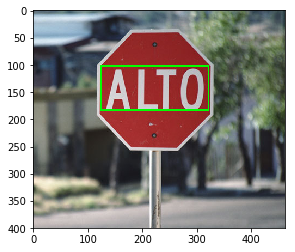

In [18]:
plt.imshow(orig)

In [19]:
# TO save the image
cv2.imwrite("target.jpg", orig) 

True